# 最优线绘制

In [16]:
from methods.our_method import Our_method
from methods.trans_lasso import Trans_lasso
from methods.t_lasso import T_lasso
from methods.least_square import Least_square


from evaluator.evaluator import *
from evaluator.sample_generator import *
from tqdm import tqdm
from matplotlib import pyplot as plt
import time
import numpy as np
# from methods.utils import *

In [5]:
n_features=16
n_samples=100
n_packs=101
s=16
# L_list=[2,4,8,12,16,20,24,28,32,36,40]
L_list=[2,4,8,12,16]
h_list=[2,6]
model_dic={"ours":Our_method(n_features,s,1),"Trans_lasso":Trans_lasso(n_features,s,1),"lasso":T_lasso(n_features,s,1),"Least_square":Least_square(n_features,s,1)}

In [6]:
import multiprocessing
workers=multiprocessing.cpu_count()
result_list=[]
for h in [2,6]:
    result_list.append([])
    for L in tqdm(L_list):
    # for L in tqdm([2,4,8,12]):
        result_list[-1].append([])
        eval=evaluator(repeat_times=1,model_num=len(model_dic))
        for i in range(5):#选一个可以被workers整除的数
            sample_packs,coef_true=t22_eval(n_features,s,n_packs,n_samples,h,L)
            eval.append(model_dic,sample_packs,coef_true,s,L,False)
        eval.run(workers,False)
        result_list[-1][-1]=eval.result_list
#将result_list保存下来
result_list=np.array(result_list)
np.save('log/result_list5'+time.strftime("%m-%d", time.localtime())+'.npy',result_list)

100%|██████████| 5/5 [00:37<00:00,  7.42s/it]


In [7]:
result_list.shape

(2, 5, 4, 5)

In [8]:
result=np.mean(result_list,axis=3)
#将第二个轴和第三个轴交换
result=np.swapaxes(result,1,2)

In [18]:
from matplotlib import pyplot as plt

def plot_graphs(model_dic,result_list,h_list,L_list,n_samples=100,):
    fig=plt.figure(figsize=(20,5))
    for i in range(len(h_list)):
        ax=fig.add_subplot(1,len(h_list),i+1)
        ax.set_title('h='+str(h_list[i]))
        for j in range(len(model_dic)):
            ax.plot(L_list,result_list[i,j,:],label=list(model_dic.keys())[j])
        
        ax.plot(L_list,,label='Optimal SSE')
        ax.legend()
        ax.set_xlabel('L')
        ax.set_ylabel('SSE')
    plt.show()

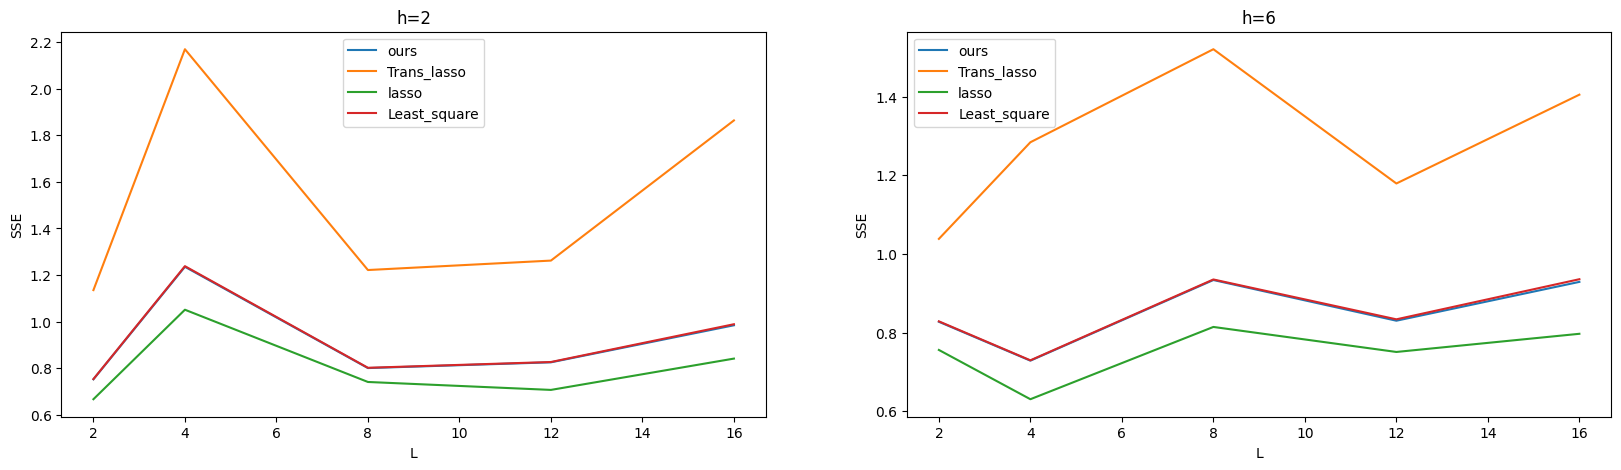

In [15]:
plot_graphs(model_dic,result,h_list,L_list)

$E(SSE)=E(tr((X^TX)^{-2}))E(\epsilon ^2)$   
不知道对不对